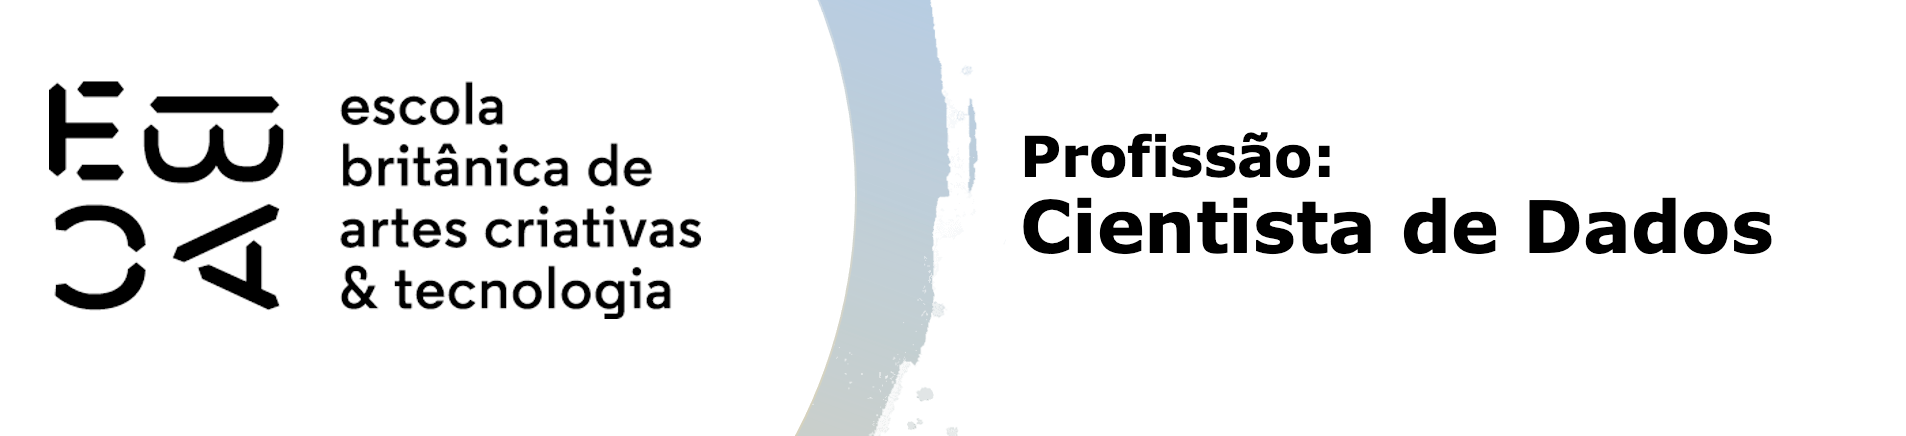

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [14]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [16]:
features = [
    'Administrative',
    'Administrative_Duration',
    'Informational',
    'Informational_Duration',
    'ProductRelated',
    'ProductRelated_Duration'
]

df_scope = df[features]

In [18]:
df_scope.describe().T


,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.0000,1.000000,4.000000,27.00000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.0000,7.500000,93.256250,3398.75000
Informational,12330.0,0.503569,1.270156,0.0,0.0000,0.000000,0.000000,24.00000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.0000,0.000000,0.000000,2549.37500
ProductRelated,12330.0,31.731468,44.475503,0.0,7.0000,18.000000,38.000000,705.00000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223


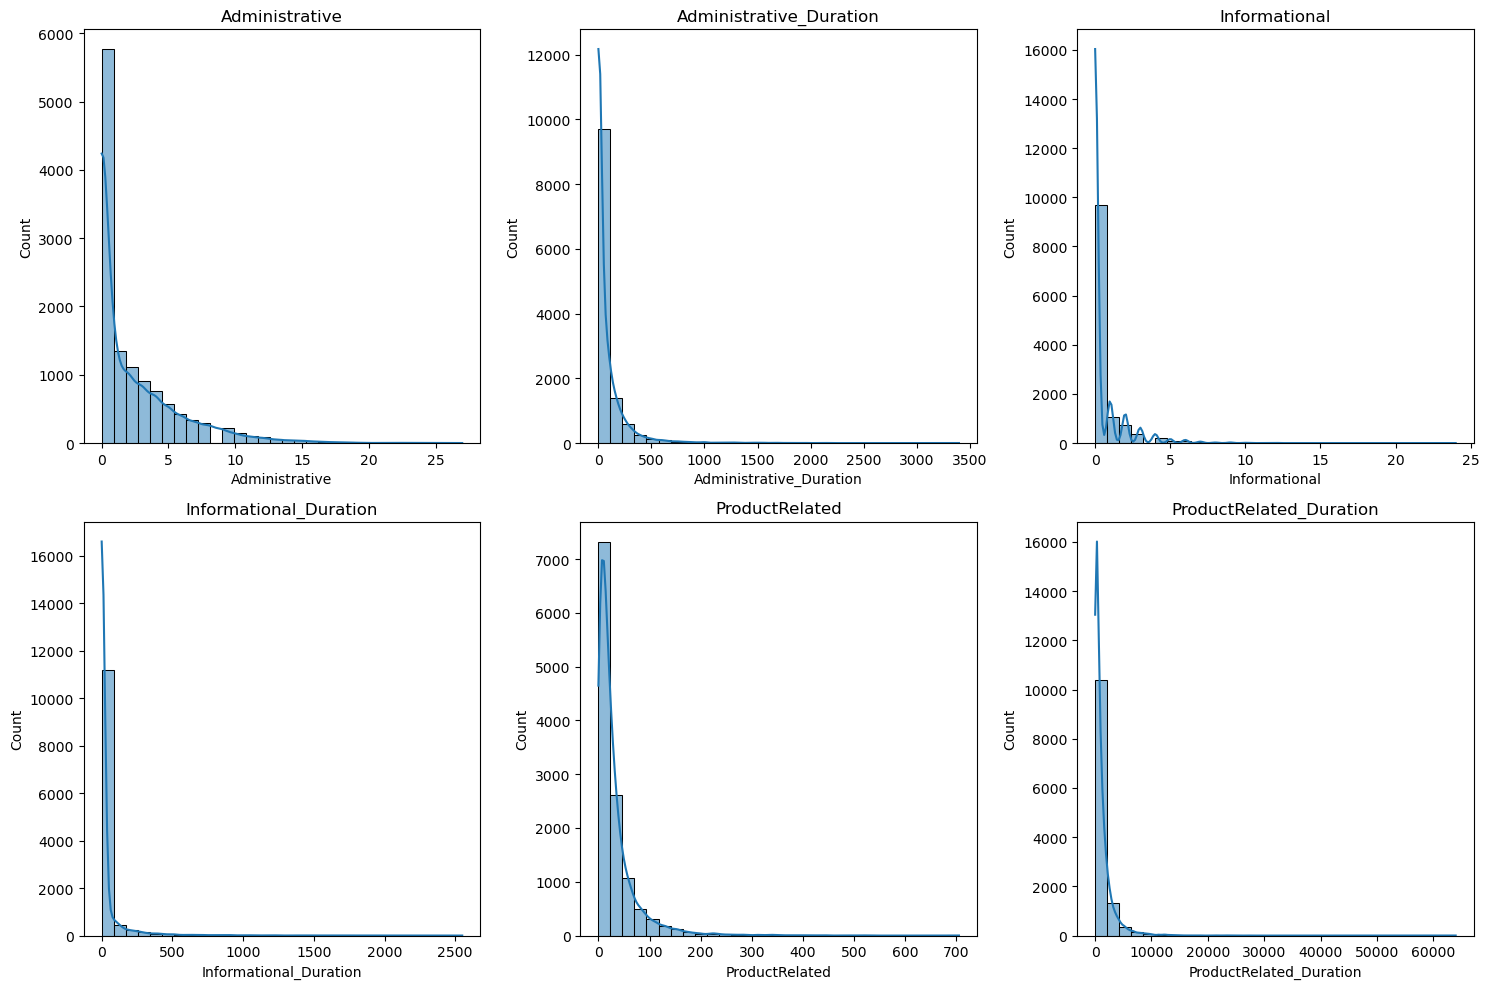

In [20]:
plt.figure(figsize=(15,10))

for i, col in enumerate(df_scope.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_scope[col], bins=30, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [22]:
df_scope.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

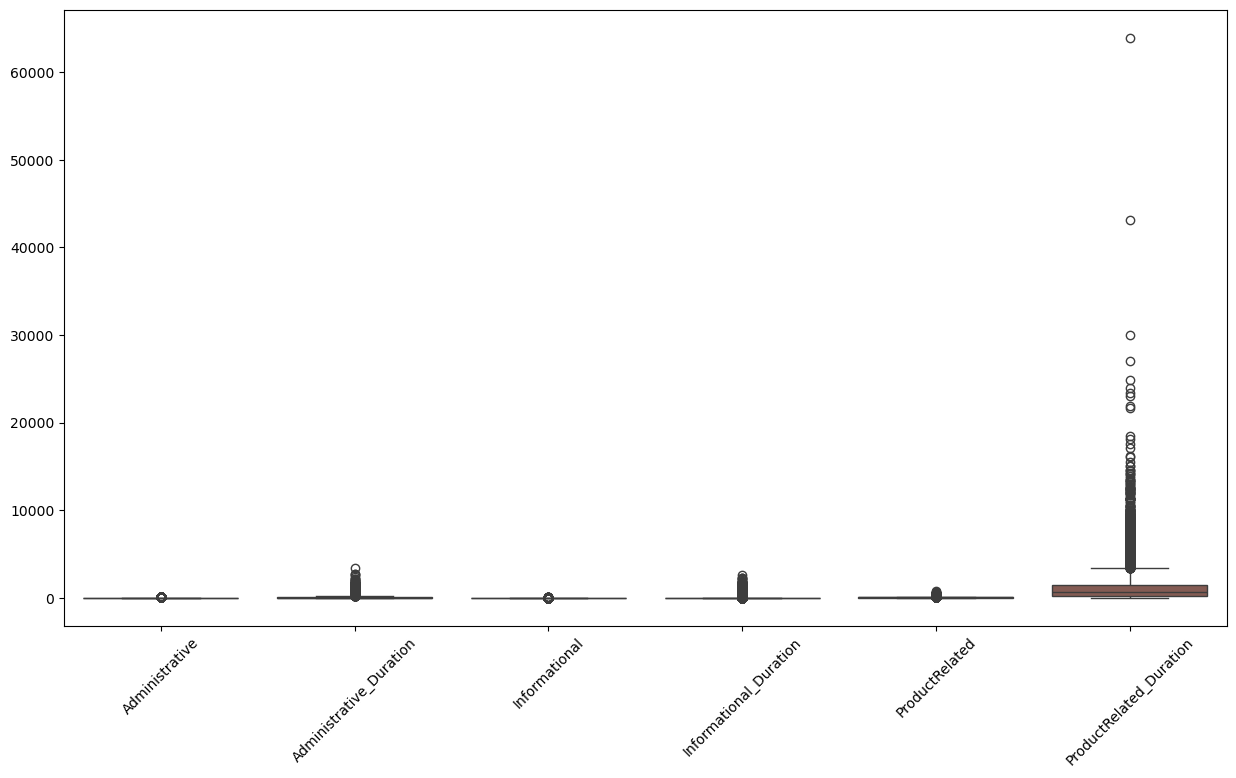

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_scope)
plt.xticks(rotation=45)
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scope)

In [28]:
df_log = np.log1p(df_scope)

----------------

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_scope)

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

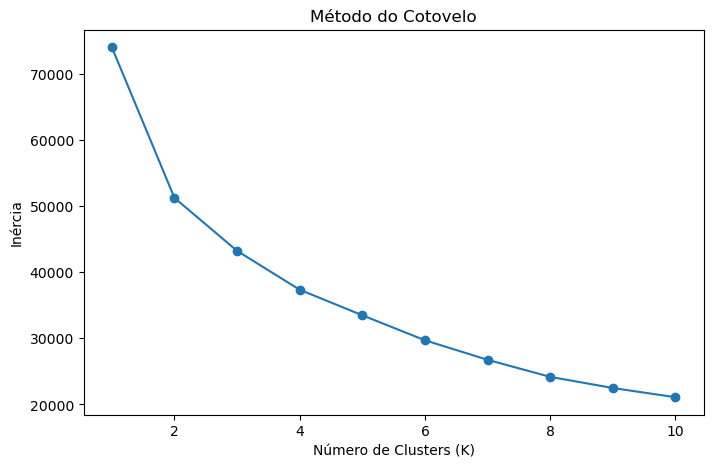

In [34]:
inertia = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()


O método do cotovelo indica uma redução acentuada da inércia até aproximadamente K = 3, a partir do qual a curva passa a apresentar redução marginal. Esse comportamento sugere que a maior parte da variabilidade dos dados é explicada com três clusters, sendo que valores maiores de K não trazem ganhos significativos em termos de compactação dos grupos. Dessa forma, optou-se inicialmente pela utilização de 3 clusters.

------------------

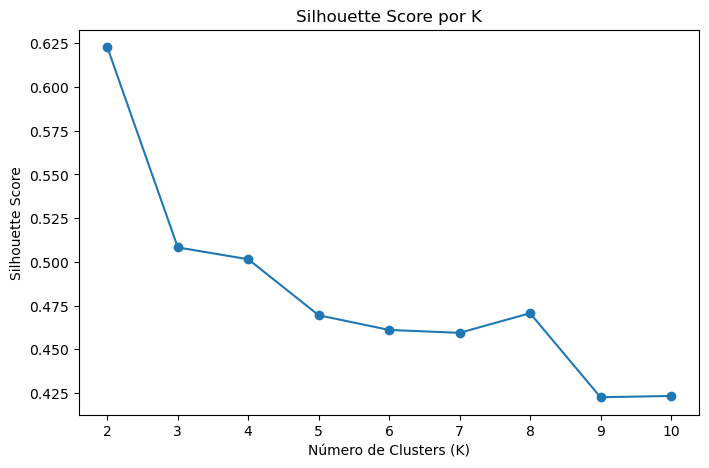

In [36]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # silhouette não existe para k=1
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score por K')
plt.show()

O Silhouette Score apresenta seu valor máximo para K = 2, indicando clusters bem definidos. No entanto, essa configuração resulta em uma segmentação excessivamente simplificada. Para K = 3, o índice ainda apresenta valor elevado, mantendo boa separação entre os grupos, ao mesmo tempo em que permite uma segmentação mais rica e interpretável do comportamento de navegação dos usuários. Considerando conjuntamente o Método do Cotovelo e o Silhouette Score, optou-se pela utilização de 3 clusters no modelo K-means.

----------

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

In [44]:
from sklearn.cluster import KMeans

# K = 2
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
df['cluster_k2'] = kmeans_2.fit_predict(X_scaled)

# K = 3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster_k3'] = kmeans_3.fit_predict(X_scaled)

In [46]:
cluster_k2_desc = df.groupby('cluster_k2')[features].mean()
cluster_k2_desc

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster_k2,,,,,,
0,1.497213,44.130111,0.189077,7.093277,21.376925,776.521555
1,7.270177,303.070693,2.408701,200.330001,94.457355,3728.273198


In [48]:
cluster_k3_desc = df.groupby('cluster_k3')[features].mean()
cluster_k3_desc

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration
cluster_k3,,,,,,
0,7.027322,266.013931,4.142077,469.448035,138.418944,5745.803542
1,0.927004,24.924726,0.160976,6.570777,18.955368,690.181328
2,6.573831,253.314236,0.997129,43.448289,56.668171,2103.531829


A análise descritiva dos agrupamentos evidencia que a solução com dois clusters separa os usuários apenas em grupos de baixo e alto engajamento, resultando em uma segmentação excessivamente ampla. Por outro lado, a solução com três clusters permite identificar perfis distintos de navegação, diferenciando usuários com baixo engajamento, usuários em fase de consideração e usuários altamente engajados. Dessa forma, considerando a maior riqueza interpretativa e o alinhamento com o objetivo da análise, optou-se pelo agrupamento final com 3 clusters.

------

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [51]:
df.groupby('cluster_k3')[['BounceRates']].mean()


,BounceRates
cluster_k3,
0,0.006788
1,0.027194
2,0.006487


A análise do bounce rate por cluster evidencia diferenças significativas no nível de engajamento dos usuários. O cluster 1 apresenta a maior taxa de rejeição, indicando sessões mais curtas e menor interação com o site. Em contrapartida, os clusters 0 e 2 apresentam taxas de rejeição significativamente menores, sugerindo navegação mais profunda e maior interesse no conteúdo disponibilizado.

------

In [56]:
df.groupby('cluster_k3')['Revenue'].mean()

cluster_k3
0    0.306011
1    0.125334
2    0.233388
Name: Revenue, dtype: float64

O cluster 0 possui os clientes mais propensos à compra, apresentando a maior taxa de conversão (Revenue) e baixo bounce rate, o que indica navegação profunda, maior interesse nos produtos e maior probabilidade de concluir a compra.

-----
A avaliação dos clusters em relação às variáveis fora do escopo do agrupamento evidencia diferenças claras no comportamento de conversão dos usuários. O cluster 0 apresenta a maior taxa de Revenue, indicando maior propensão à compra, além de baixo bounce rate, o que sugere sessões mais longas e maior engajamento. O cluster 2 apresenta uma taxa de conversão intermediária, enquanto o cluster 1 concentra usuários com maior taxa de rejeição e menor propensão à compra. Esses resultados reforçam a validade do agrupamento e confirmam que diferentes padrões de navegação estão associados a diferentes níveis de intenção de compra.

----

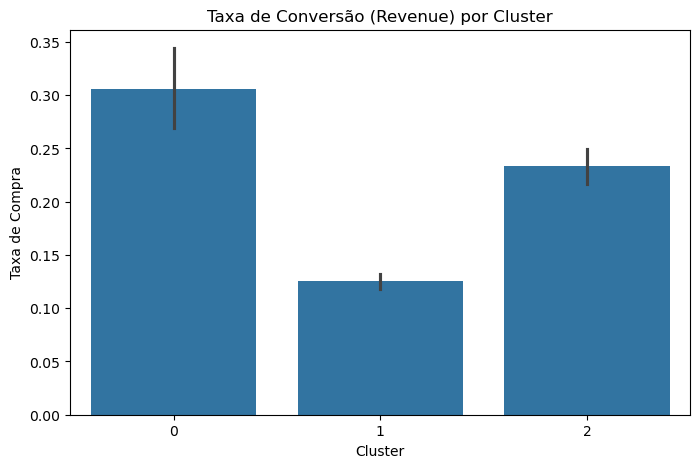

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    x='cluster_k3',
    y='Revenue',
    data=df
)
plt.title('Taxa de Conversão (Revenue) por Cluster')
plt.ylabel('Taxa de Compra')
plt.xlabel('Cluster')
plt.show()

O gráfico de taxa de conversão por cluster evidencia diferenças significativas no comportamento de compra dos usuários. Observa-se que o cluster 0 apresenta a maior taxa média de conversão, indicando usuários com maior propensão à compra. O cluster 2 apresenta taxa intermediária, sugerindo usuários em fase de consideração, enquanto o cluster 1 concentra usuários com menor taxa de conversão, associados a menor engajamento. Esses resultados reforçam a validade do agrupamento e demonstram a relação entre comportamento de navegação e propensão à compra.

-----
